In [1]:
import os
import cv2
import numpy as np
from time import time
import tensorflow as tf
import keras
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pylab as py
import random
import pylab as pl
from PIL import Image, ImageFilter


In [458]:
def visualize(train_dir):
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'space', 'nothing', 'del']
    plt.figure(figsize=(15, 15))
    for i in range (0,26):
        plt.subplot(8,8,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}27.jpg".format(classes[i])
        img = plt.imread(path)
        grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 80, 1, cv2.THRESH_BINARY)
        #if(i==0):
            #print(grayImage)
            #print(img.shape)
        #img_gray = np.array(Image.open(path).convert('L'))
        #maxval = 1
        #im_bin = (img_gray > 95) * maxval
        #print(im_bin.shape)
        plt.imshow(blackAndWhiteImage)
        #print(grayImage.shape)
        plt.xlabel(classes[i])

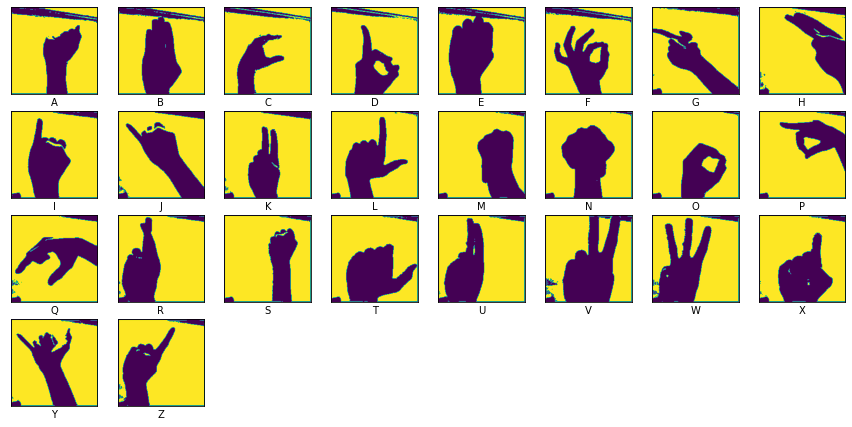

In [459]:
train_dir = './asl_alphabet_train/asl_alphabet_train'
visualize(train_dir)


In [419]:
def split_data(train_dir):
    images = []
    labels = []
    size = 50,50
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            if image[0] != '.':
                temp_img = plt.imread(train_dir + '/' + folder + '/' + image)
                grayImage = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
                (thresh, temp_img) = cv2.threshold(grayImage, 100, 1, cv2.THRESH_BINARY)
                if type(temp_img) is np.ndarray:
                    temp_img = cv2.resize(temp_img, size)
                    images.append(np.reshape(temp_img,(2500)))
                    labels.append(index)
    images = np.array(images)
    #images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    np.save("x_train.npy",x_train)
    np.save("x_test.npy",x_test)
    np.save("y_train.npy",y_train)
    np.save("y_test.npy",y_test)
    return x_train, x_test, y_train, y_test

In [420]:
#from to_import import split_data
x_train, x_test, y_train, y_test = split_data(train_dir)


In [460]:
x_train2 = x_train[:500]
x_test2 = x_test[:100]
y_train2 = y_train[:500]
y_test2 = y_test[:100]

#print(x_train2.shape)
#print(x_test2.shape)
#print(y_train2.shape)
#print(y_test2.shape)
#print(y_test2[26])



In [461]:
#print(y_train.shape)
Y_train = []
Y_test = []
vowels = [0,4,8,14,20]
for i in range(y_train2.shape[0]):
    Y_train.append(np.where(y_train2[i]==1)[0][0])
    if Y_train[i] in vowels:
        Y_train[i] = [0,1]
    else:
        Y_train[i] = [1,0]
for i in range(y_test2.shape[0]):
    Y_test.append(np.where(y_test2[i]==1)[0][0])
    if Y_test[i] in vowels:
        Y_test[i] = [0,1]
    else:
        Y_test[i] = [1,0]
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

#print(x_test2)


In [462]:
import gplearn

import pandas as pd
from gplearn.genetic import SymbolicRegressor,SymbolicClassifier
#print(Y_train.shape)

In [11]:
predicted = est_gp.predict(x_train)
correct = 0
for i in range(Y_train.shape[0]):
    if int(predicted[i]) == Y_train[i]:
        correct+=1

print("Accuracy: ", correct * 100 / Y_train.shape[0], "%" )
# threshold 127
# 2000 : 8.8%
# 2100 : 9.6%
# 2500 : 10.4%
# threshold 90
# 2000 : 11.6%
# 2100 : 

# threshold -> 80, gens -> 100
#2.8
# threshold -> 90, gens -> 100

#threshold -> 100, gens -> 100

Accuracy:  3.6 %


In [465]:
import CGP
from CGP import cgpann

In [466]:
cgp_model = cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=30, connections=1, generations=2000,
                 offsprings=10, mutationRate=0.2, learning_rate=0.01,outMutationChance=0.4,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=True)

In [455]:
cgp_model.fit_data(x_train2,Y_train)
predicted = cgp_model.predict_data(x_test2)
correct = 0
for i in range(Y_test.shape[0]):
    #print(predicted[i])
    if np.argmax(predicted[i]) == np.argmax(Y_test[i]):
        #print(maxi(predicted[i]))
        correct+=1
#print()
print("Accuracy: ", correct * 100 / y_test2.shape[0], "%" )

Generation number:  1  is having mse:  0.40249999999999997
Generation number:  2  is having mse:  0.40249999999999997
Generation number:  3  is having mse:  0.40249999999999997
Generation number:  4  is having mse:  0.40249999999999997
Generation number:  5  is having mse:  0.39849999999999997
Generation number:  6  is having mse:  0.375
Generation number:  7  is having mse:  0.375
Generation number:  8  is having mse:  0.37474999999999997
Generation number:  9  is having mse:  0.37474999999999997
Generation number:  10  is having mse:  0.37474999999999997
Generation number:  11  is having mse:  0.37474999999999997
Generation number:  12  is having mse:  0.37474999999999997
Generation number:  13  is having mse:  0.3075
Generation number:  14  is having mse:  0.3075
Generation number:  15  is having mse:  0.3075
Generation number:  16  is having mse:  0.28
Generation number:  17  is having mse:  0.238
Generation number:  18  is having mse:  0.238
Generation number:  19  is having mse: 

RESULTS:
Threshold 80 -> 63.2 %, 67.4%, 79.6%, 80.2%, 65.8%, 53.6%, 63.2%, 74.6%, 74.8% 78.4% ---> AVG: 72.08%
Threshold 90 -> 73.8%, 57.6%, 64.0%, 63.8%, 71.4%, 75%, 63.8%, 53.6%, 61.8%, 65.8% ---> AVG: 67.06%
Threshold 100 -> 62.8%, 69.6%, 71.2%, 75.4%, 79.8%, 68.0 %, 61.0%, 74.2%, 68.0%, 74.2 ---> AVG: 72.42%
cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=20, connections=3, generations=100,
                 offsprings=10, mutationRate=0.1, learning_rate=0.1,outMutationChance=0.2,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=False)
                 
---------------------------------------------------------------------------------------------------------
Nodes 10 -> 71.8%, 71.2%, 70.4%, 74.8%, 66.4%, 76.0%, 66.8%, 72.2%, 76.4%, 78.2% ---> AVG: 74.42%
Nodes 20 -> 80.4%, 79.2%, 71.0%, 73.6%, 70.6%, 73.0%, 68.4%, 65.2%, 75.4%, 76.2% ---> AVG: 75.3%
Nodes 30 -> 72.6%, 77.2%, 80.0%, 81.4%, 73.8%, 64.0%, 76.4%, 70.4%, 77.0%, 74.4% ---> AVG: 76.72%
cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=30, connections=3, generations=100,
                 offsprings=10, mutationRate=0.1, learning_rate=0.1,outMutationChance=0.2,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=False)
                 
---------------------------------------------------------------------------------------------------------
Offsprings 10 -> 72.6%, 77.2%, 80.0%, 81.4%, 73.8%, 64.0%, 76.4%, 70.4%, 77.0%, 74.4% ---> AVG: 76.72%
Offsprings 20 -> 78.8%, 68.4%, 78.8%, 63.6%, 77.6%, 64.0%, 74.2%, 79.4%, 74.6%, 79.4% ---> AVG: 75.88%
Offsprings 30 -> 72.6%, 77.4%, 78.8%, 75.2%, 73.0%, 70.2%, 62.8%, 78.4%, 71.2%, 75.2% ---> AVG: 75.48%
cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=30, connections=3, generations=100,
                 offsprings=30, mutationRate=0.1, learning_rate=0.1,outMutationChance=0.2,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=False)
                 
----------------------------------------------------------------------------------------------------------
Connections 1 -> 79.4%, 75.4%, 79.2%, 69.0%, 77.2%, 77.8%, 79.2%, 73.0%, 65.2%, 76.6% ---> AVG: 77.2%
Connections 2 -> 77.8%, 56.0%, 69.0%, 61.2%, 62.8%, 71.8%, 72.0%, 68.8%, 70.4%, 69.4 ---> AVG: 69.92%
Connections 3 -> 72.6%, 77.2%, 80.0%, 81.4%, 73.8%, 64.0%, 76.4%, 70.4%, 77.0%, 74.4% ---> AVG: 76.72%
cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=30, connections=1, generations=100,
                 offsprings=10, mutationRate=0.1, learning_rate=0.1,outMutationChance=0.2,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=False)
                 
----------------------------------------------------------------------------------------------------------
Mutation 0.1 -> 79.4%, 75.4%, 79.2%, 69.0%, 77.2%, 77.8%, 79.2%, 73.0%, 65.2%, 76.6% ---> AVG: 77.2%
Mutation 0.2 -> 77.2%, 79.8%, 79.6%, 78.4%, 66.2%, 77.8%, 80.0%, 68.0%, 79.6%, 76.0% ---> AVG: 78.26%
Mutation 0.3 -> 63.6%, 71.2%, 68.4%, 78.4%, 70.4%, 65.4%, 73.4%, 61.8%, 74.4%, 76.2% ---> AVG: 72.23%
cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=30, connections=1, generations=100,
                 offsprings=10, mutationRate=0.3, learning_rate=0.1,outMutationChance=0.2,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=False)
                 
----------------------------------------------------------------------------------------------------------
Learning rate 0.1 -> 77.2%, 79.8%, 79.6%, 78.4%, 66.2%, 77.8%, 80.0%, 68.0%, 79.6%, 76.0% ---> AVG: 78.26%
Learning rate 0.01 -> 77.2%, 70.8%, 76.0%, 70.6%, 72.2%, 75.2%, 73.0%, 69.4%, 75.0%, 79.4% ---> AVG: 75.88%
cgpann(num_features = x_train2.shape[1], num_outputs = 2, nodes=30, connections=1, generations=100,
                 offsprings=10, mutationRate=0.2, learning_rate=0.001,outMutationChance=0.2,
                 nodesPerOut=2, functions=3, gene_type=3, seed=42, verbose=False)
                 
-----------------------------------------------------------------------------------------------------------
Generations 100 -> 77.2%, 79.8%, 79.6%, 78.4%, 66.2%, 77.8%, 80.0%, 68.0%, 79.6%, 76.0% ---> AVG: 78.26%
Generations 200 -> 77.8%, 75.8%, 78.8%, 75.4%, 80.4%, 80.0%, 79.8%, 76.4%, 80.4%, 78.8% ---> AVG: 80.36%
Generations 500 -> 83.0%, 82.0%, 80.0%, 81.0%, 82.0%, 82.0%, 82.0%, 81.0%, 82.0%, % ---> AVG: 81.7%
